In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('../Datasets/Social_Network_Ads.csv')
#data = data.drop('User ID',axis=1)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
y = data['Purchased']
#x = data.drop('Purchased',axis=1)

In [6]:
x_gender = pd.get_dummies(data['Gender'],drop_first=True)
other_cls = ['Age','EstimatedSalary','User ID']
x_other = data[other_cls]
x = pd.concat([x_gender, x_other],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2, shuffle = False)

In [7]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
print('Actual VS Predicted')
for i in range(len(y_test)):
    print(y_test.iloc[i],'       ',y_pred[i])

Actual VS Predicted
1         1
1         0
0         0
1         0
1         1
0         0
0         0
0         0
1         1
1         1
0         0
1         1
0         0
0         0
1         0
0         0
1         1
0         0
0         0
1         1
1         1
0         0
0         0
1         0
1         1
0         0
1         0
1         1
0         0
0         0
1         1
0         0
1         0
0         0
1         0
1         0
1         0
0         0
1         0
0         0
1         1
1         0
1         0
0         0
1         1
1         0
1         0
1         0
0         0
1         0
1         0
1         0
0         0
1         1
0         0
1         0
0         0
0         0
1         0
1         0
0         0
1         0
1         1
1         0
1         0
1         0
1         0
0         0
1         0
1         0
1         0
1         0
1         0
1         0
0         0
1         0
1         0
1         0
0         0
1         0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


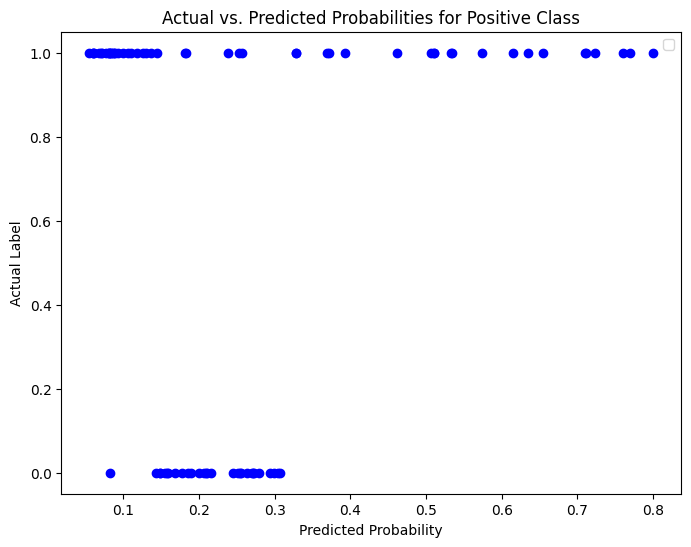

In [10]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_proba, y_test, color='blue')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Label')
plt.title('Actual vs. Predicted Probabilities for Positive Class')
plt.legend()
plt.show()